In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from Modules.ShapeShadow import Ellipse, Sector, Mask
from Modules.Beamer import elongation

In [2]:

data_dir =r"C:\Users\BjoernSchytzBruun\OneDrive - RadiSurf ApS\Dokumenter - Shared Drive\Working folders\Christina working folder\Ellipsometry - Focusprobes mapping"
file_name = "Test of different recipes with focusprobes on elipsometer.xlsx"

if not os.path.exists(os.path.join(data_dir, file_name)):
    raise FileNotFoundError("You dummy")

In [3]:
df = pd.read_excel(os.path.join(data_dir, file_name), sheet_name="Map Coordinations", usecols="U,V", skiprows=[0])
df.rename(columns={df.columns[0]: 'x', df.columns[1]: 'y'}, inplace=True)

theta = 5.1
alpha = 75

spot_coor = Mask(df.x, df.y)
#spot_coor.rotate(5.1).translate(x_offset=0.0673, y_offset=-.4477)
spot_coor.translate(0, -0.32).rotate(theta)

d_spot = 0.03
e_spot = elongation(d_spot, alpha)

sector0 = Sector(2*2.54, 90)
sector0.rotate(225+5.1)


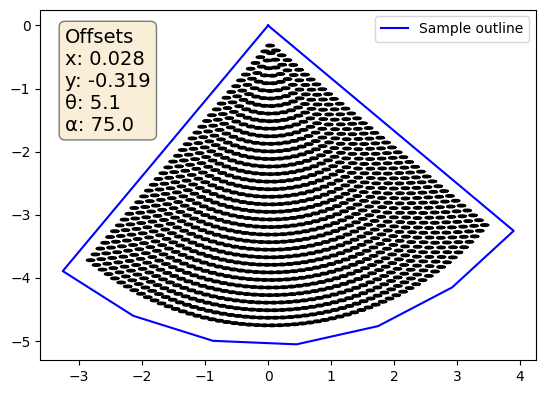

In [4]:
fig, ax = plt.subplots()
ax.plot(sector0.x, sector0.y, '-b', label="Sample outline")

for x, y in zip(spot_coor.x, spot_coor.y):
    ellipse = Ellipse(major=e_spot, minor=d_spot)
    ellipse.translate(x, y)
    ax.plot(ellipse.x, ellipse.y, '-k')

textstr = '\n'.join((
    "Offsets",
    f"x: {spot_coor.x[0]:.3f}",
    f"y: {spot_coor.y[0]:.3f}",
    f"\u03B8: {theta:.1f}",
    f"\u03B1: {alpha:.1f}")
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax.set_aspect('equal')
plt.legend()
plt.show()